# Download the Dataset

In [17]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
cd /content/drive/Mydrive/Datasets

[Errno 2] No such file or directory: '/content/drive/Mydrive/Datasets'
/content


# Image Augmentation

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [36]:
xtrain = train_datagen.flow_from_directory(r'/content/drive/MyDrive/Datasets/flowers',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

Found 4318 images belonging to 5 classes.


In [37]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [40]:
xtest = test_datagen.flow_from_directory(r'/content/drive/MyDrive/Datasets/flowers',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

Found 4318 images belonging to 5 classes.


In [41]:
xtrain.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

# Create Model

In [42]:
from tensorflow.keras.models import Sequential

In [43]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [44]:
model = Sequential()

#Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden Layers),Output)

In [16]:
#Convolution

In [45]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

In [ ]:
#Pooling

In [46]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#Flatten

In [47]:
model.add(Flatten())

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Dense / Hidden Layers

In [49]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [50]:
model.add(Dense(5,activation='softmax'))

In [51]:
32*(3*3*3+1)

896

# Compile the model

In [54]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
len(xtrain)

44

# Fit the model

In [95]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [96]:
early_stopping = EarlyStopping(monitor='val_accuracy',
                        patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                        patience=5,
                        factor=0.5,min_lr=0.00001)

callback = [reduce_lr,early_stopping]

In [97]:
model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=10,
                    validation_data=xtest,
                    validation_steps=len(xtest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
44/44 [==============================] - 58s 1s/step - loss: 1.4943 - accuracy: 0.3962 - val_loss: 1.2378 - val_accuracy: 0.4845
Epoch 2/10
44/44 [==============================] - 57s 1s/step - loss: 1.1092 - accuracy: 0.5452 - val_loss: 1.1737 - val_accuracy: 0.5449
Epoch 3/10
44/44 [==============================] - 57s 1s/step - loss: 1.0345 - accuracy: 0.5912 - val_loss: 1.0172 - val_accuracy: 0.6121
Epoch 4/10
44/44 [==============================] - 57s 1s/step - loss: 0.9559 - accuracy: 0.6343 - val_loss: 1.0397 - val_accuracy: 0.6012
Epoch 5/10
44/44 [==============================] - 57s 1s/step - loss: 0.8898 - accuracy: 0.6626 - val_loss: 0.8863 - val_accuracy: 0.6758
Epoch 6/10
44/44 [==============================] - 57s 1s/step - loss: 0.8491 - accuracy: 0.6746 - val_loss: 0.8010 - val_accuracy: 0.6989
Epoch 7/10
44/44 [==============================] - 57s 1s/step - loss: 0.7946 - accuracy: 0.7003 - val_loss: 0.9936 - val_accuracy: 0.6364
Epoch 8/10
44/44 [==

# Saving the model




In [98]:
model.save('Flowers.h5')

In [99]:
ls

drive/  Flowers.h5  sample_data/


# Testing the model

In [100]:
import numpy as np

In [101]:
from tensorflow.keras.models import load_model

In [102]:
from tensorflow.keras.preprocessing import image

In [103]:
img1 = image.load_img(r'/content/drive/MyDrive/Datasets/flowers/tulip/2336919121_851ebc4754.jpg')

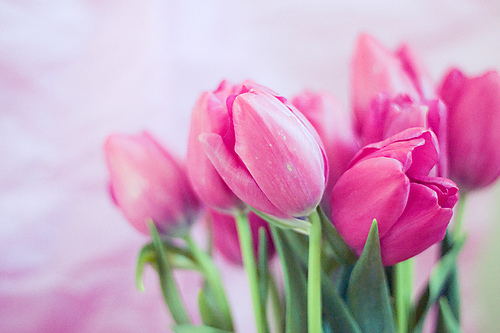

In [104]:
img1

In [117]:
img1 = image.load_img(r'/content/drive/MyDrive/Datasets/flowers/tulip/2336919121_851ebc4754.jpg', target_size=(64, 64))

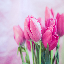

In [118]:
img1

In [119]:
x = image.img_to_array(img1)
x

array([[[218., 216., 240.],
        [218., 212., 238.],
        [219., 211., 234.],
        ...,
        [221., 207., 224.],
        [219., 202., 218.],
        [218., 204., 219.]],

       [[219., 219., 243.],
        [221., 219., 241.],
        [221., 217., 240.],
        ...,
        [223., 211., 225.],
        [224., 206., 220.],
        [221., 204., 220.]],

       [[221., 219., 241.],
        [220., 221., 242.],
        [221., 222., 243.],
        ...,
        [222., 209., 227.],
        [222., 208., 223.],
        [219., 203., 216.]],

       ...,

       [[198., 152., 198.],
        [199., 151., 193.],
        [201., 155., 192.],
        ...,
        [184., 186., 173.],
        [176., 185., 166.],
        [171., 183., 159.]],

       [[197., 145., 191.],
        [199., 150., 195.],
        [198., 149., 194.],
        ...,
        [184., 182., 170.],
        [177., 182., 162.],
        [168., 178., 154.]],

       [[198., 142., 189.],
        [201., 144., 187.],
        [196., 1

In [120]:
x=np.expand_dims(x,axis=0)
x

array([[[[218., 216., 240.],
         [218., 212., 238.],
         [219., 211., 234.],
         ...,
         [221., 207., 224.],
         [219., 202., 218.],
         [218., 204., 219.]],

        [[219., 219., 243.],
         [221., 219., 241.],
         [221., 217., 240.],
         ...,
         [223., 211., 225.],
         [224., 206., 220.],
         [221., 204., 220.]],

        [[221., 219., 241.],
         [220., 221., 242.],
         [221., 222., 243.],
         ...,
         [222., 209., 227.],
         [222., 208., 223.],
         [219., 203., 216.]],

        ...,

        [[198., 152., 198.],
         [199., 151., 193.],
         [201., 155., 192.],
         ...,
         [184., 186., 173.],
         [176., 185., 166.],
         [171., 183., 159.]],

        [[197., 145., 191.],
         [199., 150., 195.],
         [198., 149., 194.],
         ...,
         [184., 182., 170.],
         [177., 182., 162.],
         [168., 178., 154.]],

        [[198., 142., 189.],
       

In [121]:
y =np.argmax(model.predict(x))
y

4

In [122]:
index =['daisy','dandelion','rose','sunflower','tulip']

In [123]:
index[y]

'tulip'

In [124]:
img2 = image.load_img(r'/content/drive/MyDrive/Datasets/flowers/rose/2265390547_2409007cef_n.jpg')

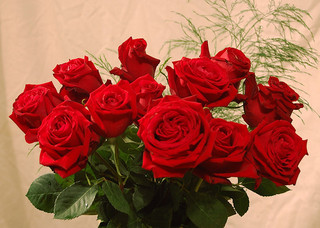

In [125]:
img2

In [126]:
img2 = image.load_img(r'/content/drive/MyDrive/Datasets/flowers/rose/2265390547_2409007cef_n.jpg', target_size = (64, 64))

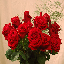

In [128]:
img2

In [129]:
x = image.img_to_array(img2)
x = np.expand_dims(x,axis=0)
y = np.argmax(model.predict(x))
index = ['daisy','dandelion','rose','sunflower','tulip']
index[y]

'rose'

In [131]:
img3 = image.load_img(r'/content/drive/MyDrive/Datasets/flowers/daisy/14163875973_467224aaf5_m.jpg',target_size=(64,64))

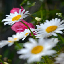

In [132]:
img3

In [146]:
x = image.img_to_array(img3)
x
x = np.expand_dims(x,axis=0)
y = np.argmax(model.predict(x))
index = ['daisy','dandelion','rose','sunflower','tulip']
index[y]

'daisy'

In [142]:
index = ['daisy','dandelion','rose','sunflower','tulip']

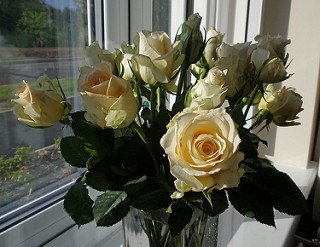

In [144]:
img = image.load_img(r'/content/drive/MyDrive/Datasets/flowers/rose/8747396730_966149e6fe_n.jpg')
img

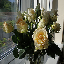

In [145]:
img = image.load_img(r'/content/drive/MyDrive/Datasets/flowers/rose/8747396730_966149e6fe_n.jpg' , target_size = (64, 64))
img

In [147]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
y = np.argmax(model.predict(x))
index = ['daisy','dandelion','rose','sunflower','tulip']
index[y]

'rose'